In [1]:
%matplotlib inline
import utils
reload(utils)

<module 'utils' from 'utils.pyc'>

Loading data from us sample

In [2]:

%time X_us_train, X_us_test, y_us_train, y_us_test = utils.LoadDataset('data_0904/US', 0.33)


CPU times: user 33.4 s, sys: 2.13 s, total: 35.5 s
Wall time: 43.7 s


Train random forest models

In [3]:
from sklearn.ensemble import RandomForestClassifier
rndf_us = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0, n_jobs=4,verbose=1)
%time rndf_us = rndf_us.fit(X_us_train, y_us_train)


[Parallel(n_jobs=4)]: Done   1 out of 100 | elapsed:   34.8s remaining: 57.5min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 14.5min finished


CPU times: user 56min 1s, sys: 9.39 s, total: 56min 10s
Wall time: 14min 28s


Evaluate classifiers

In [4]:

print  utils.classifierMetrics(rndf_us, X_us_test, y_us_test)


[Parallel(n_jobs=4)]: Done   1 out of 100 | elapsed:    3.5s remaining:  5.8min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Done   1 out of 100 | elapsed:    3.3s remaining:  5.5min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.4min finished


 mean_precision:0.963275115567 roc_auc_score :0.634365231198


In [5]:
feature_names=["same_country","same_locale","gender_mm","gender_mf","gender_mu","gender_fm","gender_ff","gender_fu",
               "gender_um","gender_uf","gender_uu","gender_m","gender_f","gender_u","picture_daily","update_profile_daily",
               "wink_daily","picture_30days","num_face","age","beauty","bright","sharp","white","indian","asian","distance",
               "fav_ratio"]
ftrs = [(n, s1) for (n, s1) in zip(feature_names, rndf_us.feature_importances_)]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US"))

Feature,US
distance,0.396851934245
wink_daily,0.214472125062
picture_daily,0.073121899395
fav_ratio,0.0492012772184
update_profile_daily,0.0459410177806
beauty,0.0422072704722
age,0.0409650650052
bright,0.0331802824782
sharp,0.0261924852447
white,0.0162773751178


Precision Recall curves

[Parallel(n_jobs=4)]: Done   1 out of 100 | elapsed:    3.4s remaining:  5.5min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.4min finished


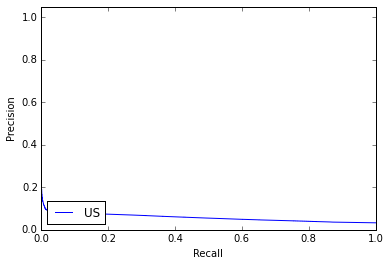

In [6]:
from sklearn.metrics import precision_recall_curve
y_us_score = rndf_us.predict_proba(X_us_test)
precision_us, recall_us, _ = precision_recall_curve(y_us_test, y_us_score[:,1])
utils.drawPRCurves(((recall_us, precision_us, "US"),))

Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
lr_us = LogisticRegression(penalty='l2')
%time lr_us= lr_us.fit(X_us_train, y_us_train)
print "US", utils.classifierMetrics(lr_us, X_us_test, y_us_test)


CPU times: user 2min, sys: 1.09 s, total: 2min 1s
Wall time: 2min 1s
US  mean_precision:0.967107861656 roc_auc_score :0.638885022108


In [8]:
lr_us.coef_[0,:]
ftrs = [(n, s1) for (n, s1) in zip(feature_names, lr_us.coef_[0,:])]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US"))

Feature,US
distance,2.51427569185
beauty,0.443361841841
gender_u,0.350828441401
same_locale,0.199664824872
picture_30days,0.188163993092
gender_m,0.122416584023
gender_fm,0.052159138732
gender_fu,0.0280408763881
bright,0.0149980398603
wink_daily,0.00690321304491


GB Classifier

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
gb_us = GradientBoostingClassifier(verbose=1)
%time gb_us= gb_us.fit(X_us_train, y_us_train)


      Iter       Train Loss   Remaining Time 
         1           0.2867           75.19m
         2           0.2852           59.93m
         3           0.2841           54.64m
         4           0.2830           51.74m
         5           0.2822           49.63m
         6           0.2815           48.22m
         7           0.2809           47.13m
         8           0.2804           45.98m
         9           0.2799           45.10m
        10           0.2795           44.22m
        20           0.2774           37.32m
        30           0.2765           31.74m
        40           0.2760           26.86m
        50           0.2757           22.13m
        60           0.2754           17.52m
        70           0.2752           12.99m
        80           0.2751            8.51m
        90           0.2750            4.19m
       100           0.2749            0.00s
CPU times: user 41min 17s, sys: 464 ms, total: 41min 18s
Wall time: 41min 20s


In [10]:
print "US", utils.classifierMetrics(gb_us, X_us_test, y_us_test)


US  mean_precision:0.967108302227 roc_auc_score :0.682830227539


In [11]:
ftrs = [(n, s1) for (n, s1) in zip(feature_names, gb_us.feature_importances_)]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US"))

Feature,US
distance,0.247421339032
wink_daily,0.179447695431
beauty,0.0834076801412
age,0.0825056332956
gender_mm,0.058589230975
gender_uu,0.0454672321811
same_locale,0.0432531544616
gender_mu,0.0358874172888
update_profile_daily,0.0342440148483
fav_ratio,0.0320458188261


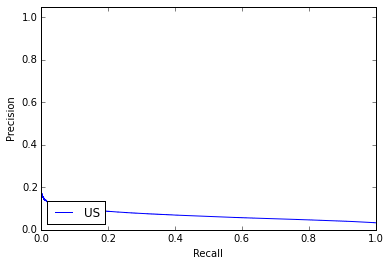

In [12]:
y_us_score = gb_us.predict_proba(X_us_test)
precision_us, recall_us, _ = precision_recall_curve(y_us_test, y_us_score[:,1])
utils.drawPRCurves(((recall_us, precision_us, "US"),))